TODO: 

I'm afraid that I'll have to translate `get_scorer` and `scorer.py` as well. It's not the end of the world, just a few hundred lines. We need to do that because the scorers accept `estimator`. They're pretty hollow otherwise, it should not be too hard.

Re. Module loading: I don't have a great solution yet. I'm leaning towards having a separate module for each main Python module (eg. `sk_linear_model`). Or maybe I can @pyimport everything to make the hierarchy work and use `@reexport`. `@require` is also interesting.

Is there some non-CV criterion by which we could identify overfitting? Mmmm

# Underfitting vs. Overfitting

Adapted from http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

This example demonstrates the problems of underfitting and overfitting and how we can use linear regression with polynomial features to approximate nonlinear functions. The plot shows the function that we want to approximate, which is a part of the cosine function. In addition, the samples from the real function and the approximations of different models are displayed. The models have polynomial features of different degrees. We can see that a linear function (polynomial with degree 1) is not sufficient to fit the training samples. This is called underfitting. A polynomial of degree 4 approximates the true function almost perfectly. However, for higher degrees the model will overfit the training data, i.e. it learns the noise of the training data. We evaluate quantitatively overfitting / underfitting by using cross-validation. We calculate the mean squared error (MSE) on the validation set, the higher, the less likely the model generalizes correctly from the training data.

In [1]:
include("preamble.jl")

 in depwarn at deprecated.jl:73
 in oldstyle_vcat_warning at /Applications/Julia-0.4.3.app/Contents/Resources/julia/lib/julia/sys.dylib
 in vect at abstractarray.jl:38
 in find_in_path at /Users/cedric/.julia/v0.4/Autoreload/src/files.jl:11
 in find_file at /Users/cedric/.julia/v0.4/Autoreload/src/files.jl:40
 in arequire at /Users/cedric/.julia/v0.4/Autoreload/src/Autoreload.jl:50
 in include at /Applications/Julia-0.4.3.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_from_node1 at /Applications/Julia-0.4.3.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /Users/cedric/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /Users/cedric/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading /Users/cedric/Programa/Sklearn/notebooks/preamble.jl, in expression starting on line 5


In [2]:
using Sklearn: Pipeline

 in depwarn at deprecated.jl:73
 [inlined code] from deprecated.jl:694
 in require at no file:0
 in arequire at /Users/cedric/.julia/v0.4/Autoreload/src/Autoreload.jl:87
 in include at /Applications/Julia-0.4.3.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_from_node1 at /Applications/Julia-0.4.3.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /Users/cedric/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /Users/cedric/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading /Users/cedric/Programa/Sklearn/notebooks/preamble.jl, in expression starting on line 5


In [3]:
#@pyimport2 sklearn.pipeline: Pipeline
@pyimport2 sklearn.preprocessing: PolynomialFeatures
@pyimport2 sklearn.linear_model: LinearRegression
@pyimport2 sklearn: cross_validation

__anon__

  likely near In[6]:11
  likely near In[6]:11
  likely near In[6]:11
  likely near In[6]:11
  likely near In[6]:11
in ___fit_and_score#92__ at /Users/cedric/Programa/Sklearn/src/cross_validation.jl:216
  likely near In[6]:11
in ___fit_and_score#92__ at /Users/cedric/Programa/Sklearn/src/cross_validation.jl:216
  likely near In[6]:11
in ___fit_and_score#92__ at /Users/cedric/Programa/Sklearn/src/cross_validation.jl:216


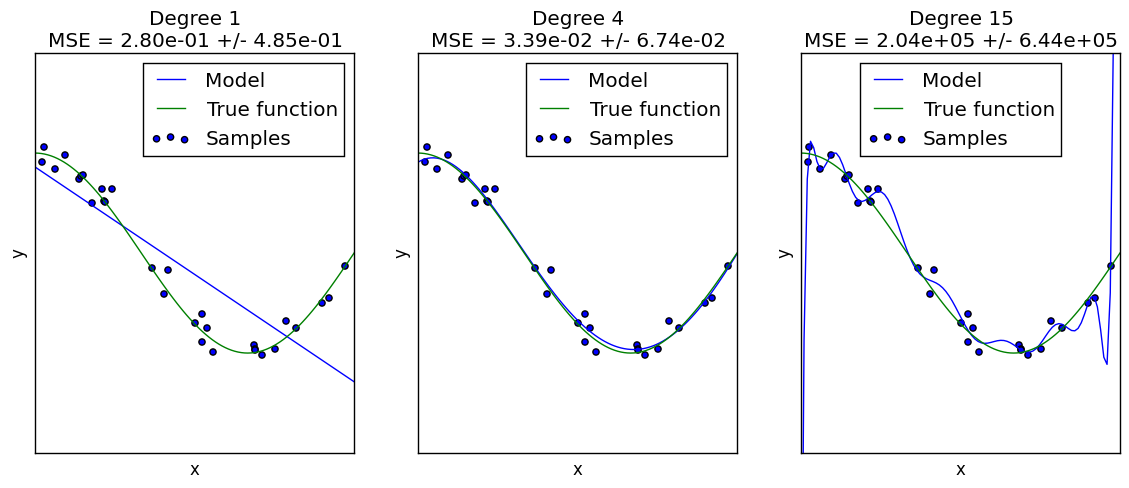

In [6]:
srand(2)

n_samples = 30
degrees = [1, 4, 15]

true_fun(X) = cos(1.5 * pi * X)
X = sort(rand(n_samples))
y = true_fun(X) + randn(n_samples) * 0.1

figure(figsize=(14, 5))
for (i, degree) in enumerate(degrees)
    ax = subplot(1, length(degrees), i)
    setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degree, include_bias=false)
    linear_regression = LinearRegression()
    pipeline = Sklearn.Pipeline([("polynomial_features", polynomial_features),
                                 ("linear_regression", linear_regression)])
    fit!(pipeline, X'', y)

    # Evaluate the models using crossvalidation
    scores = Sklearn.cross_val_score(pipeline, X'', y, scoring="mean_squared_error", cv=10)

    X_test = linspace(0, 1, 100)
    plot(X_test, predict(pipeline, X_test''), label="Model")
    plot(X_test, true_fun(X_test), label="True function")
    scatter(X, y, label="Samples")
    xlabel("x")
    ylabel("y")
    xlim((0, 1))
    ylim((-2, 2))
    legend(loc="best")
    title(@sprintf("Degree %d\nMSE = %.2e +/- %.2e", degree, -mean(scores), std(scores)))
end